In [1]:
!pip install yfinance pandas matplotlib --quiet


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import os

print("✅ Libraries loaded successfully")


✅ Libraries loaded successfully


In [3]:
os.makedirs("data", exist_ok=True)
os.makedirs("outputs", exist_ok=True)
print("✅ Folders ready")


✅ Folders ready


In [4]:
# Choose the stock
ticker = "INFY.NS"

# Fetch historical data
data = yf.download(ticker, start="2022-01-01", end="2023-12-31", auto_adjust=False)

# Calculate 50-day and 200-day SMA
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Generate signals: 1 if SMA_50 > SMA_200, else 0
data['Signal'] = 0
data.loc[data['SMA_50'] > data['SMA_200'], 'Signal'] = 1
data['Signal_Change'] = data['Signal'].diff()

# Golden Cross (0->1) and Death Cross (1->0)
golden_cross = data[data['Signal_Change'] == 1]
death_cross = data[data['Signal_Change'] == -1]

print("✅ Single stock analysis complete")


[*********************100%***********************]  1 of 1 completed

✅ Single stock analysis complete


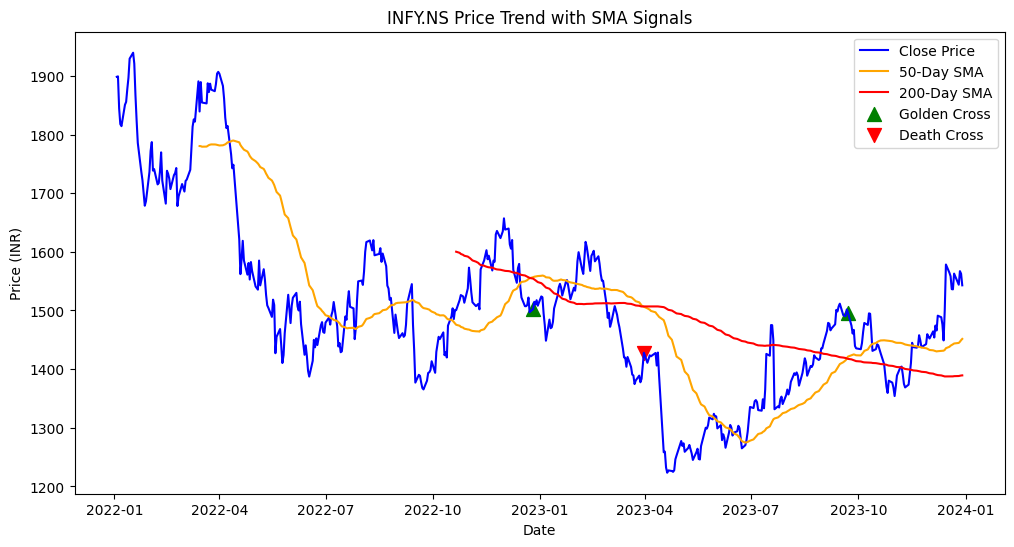

In [5]:
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['SMA_50'], label='50-Day SMA', color='orange')
plt.plot(data['SMA_200'], label='200-Day SMA', color='red')
plt.scatter(golden_cross.index, golden_cross['Close'], marker='^', color='green', s=100, label='Golden Cross')
plt.scatter(death_cross.index, death_cross['Close'], marker='v', color='red', s=100, label='Death Cross')
plt.title(f"{ticker} Price Trend with SMA Signals")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.show()


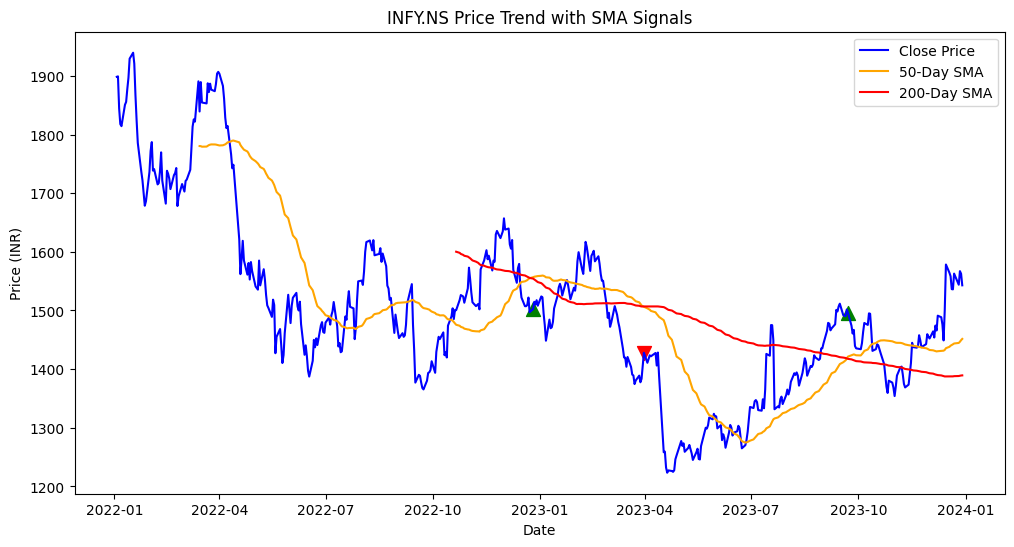

✅ Single stock CSV and plot saved


In [6]:
# Save CSV
data.to_csv(f"data/{ticker.replace('.', '_')}_analysis.csv")

# Save plot
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['SMA_50'], label='50-Day SMA', color='orange')
plt.plot(data['SMA_200'], label='200-Day SMA', color='red')
plt.scatter(golden_cross.index, golden_cross['Close'], marker='^', color='green', s=100)
plt.scatter(death_cross.index, death_cross['Close'], marker='v', color='red', s=100)
plt.title(f"{ticker} Price Trend with SMA Signals")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.savefig(f"outputs/{ticker.replace('.', '_')}_trend.png")
plt.show()
print("✅ Single stock CSV and plot saved")


[*********************100%***********************]  1 of 1 completed


✅ Fetched INFY.NS


[*********************100%***********************]  1 of 1 completed


✅ Fetched TCS.NS


[*********************100%***********************]  1 of 1 completed

✅ Fetched WIPRO.NS


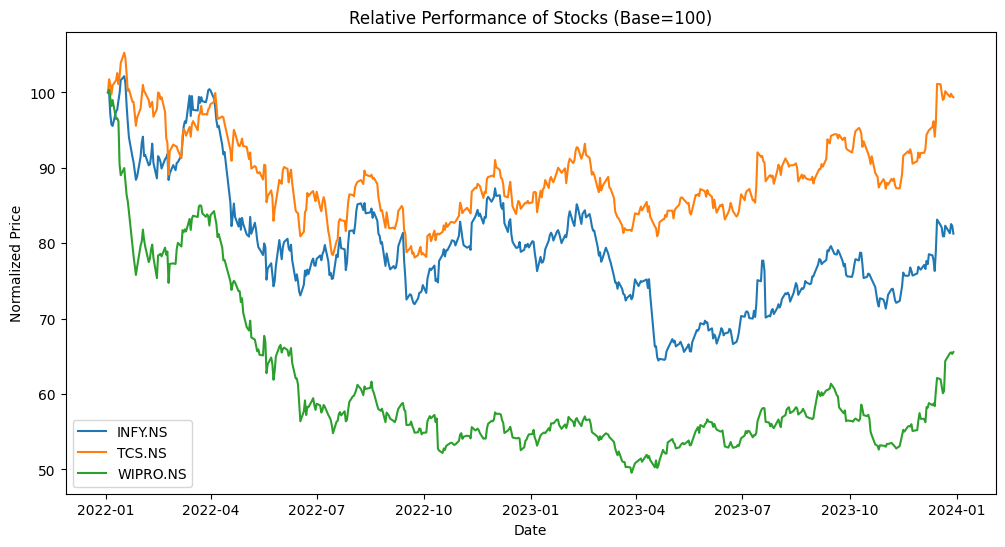

In [7]:
tickers = ["INFY.NS", "TCS.NS", "WIPRO.NS"]
series_list = []

for t in tickers:
    df_temp = yf.download(t, start="2022-01-01", end="2023-12-31", auto_adjust=False)
    series_temp = df_temp['Close'].copy()
    series_temp.name = t
    series_list.append(series_temp)
    print(f"✅ Fetched {t}")

# Combine and align dates
combined = pd.concat(series_list, axis=1).dropna(how='all')
normalized = combined / combined.iloc[0] * 100

# Plot normalized performance
plt.figure(figsize=(12,6))
for t in tickers:
    plt.plot(normalized.index, normalized[t], label=t)
plt.title("Relative Performance of Stocks (Base=100)")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()


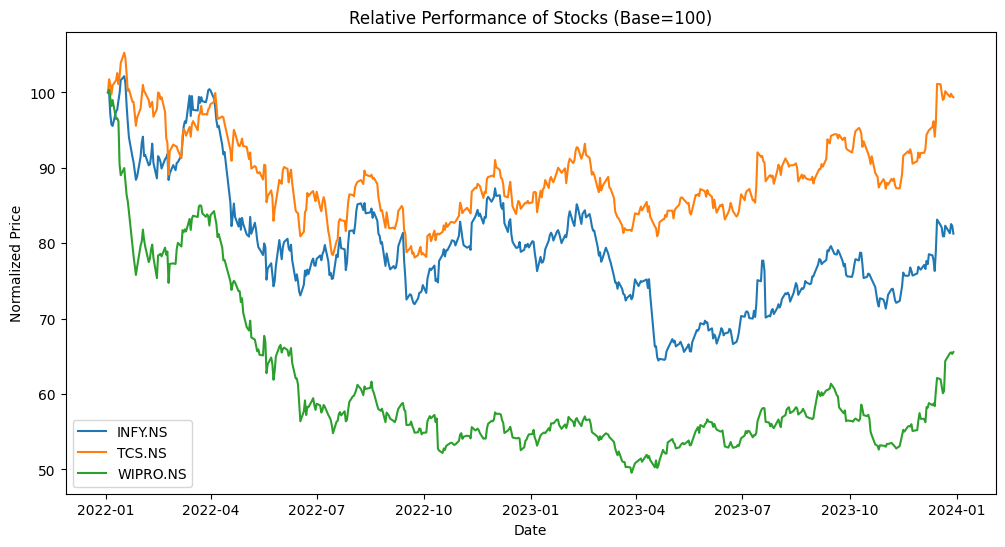

✅ Multi-stock CSV and plot saved


In [8]:
# Save combined data
combined.to_csv("data/multi_stock_analysis.csv")

# Save multi-stock plot
plt.figure(figsize=(12,6))
for t in tickers:
    plt.plot(normalized.index, normalized[t], label=t)
plt.title("Relative Performance of Stocks (Base=100)")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.savefig("outputs/multi_stock_trend.png")
plt.show()
print("✅ Multi-stock CSV and plot saved")
